In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [2]:
df_can = pd.read_csv('https://cocl.us/datascience_survey_data', index_col = (0))
# skiprows=range(20),sheet_name='Canada by Citizenship',
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
df_can.head(8)

Very interested  Somewhat interested  \
Big Data (Spark / Hadoop)              1332                  729   
Data Analysis / Statistics             1688                  444   
Data Journalism                         429                 1081   
Data Visualization                     1340                  734   
Deep Learning                          1263                  770   
Machine Learning                       1629                  477   

                            Not interested  
Big Data (Spark / Hadoop)              127  
Data Analysis / Statistics              60  
Data Journalism                        610  
Data Visualization                     102  
Deep Learning                          136  
Machine Learning                        74

In [4]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  2.2.2


In [22]:
df_can.sort_values(by='Very interested', ascending=False, axis=0, inplace=True)
#df_can_per = (100. * df_can / df_can.sum()).round(2).astype(str) + '%'
df_can_per = (100. * df_can /2233).round(2) #.astype(str) + '%'
df_can_per

Very interested  Somewhat interested  \
Data Analysis / Statistics            75.59                19.88   
Machine Learning                      72.95                21.36   
Data Visualization                    60.01                32.87   
Big Data (Spark / Hadoop)             59.65                32.65   
Deep Learning                         56.56                34.48   
Data Journalism                       19.21                48.41   

                            Not interested  
Data Analysis / Statistics            2.69  
Machine Learning                      3.31  
Data Visualization                    4.57  
Big Data (Spark / Hadoop)             5.69  
Deep Learning                         6.09  
Data Journalism                      27.32

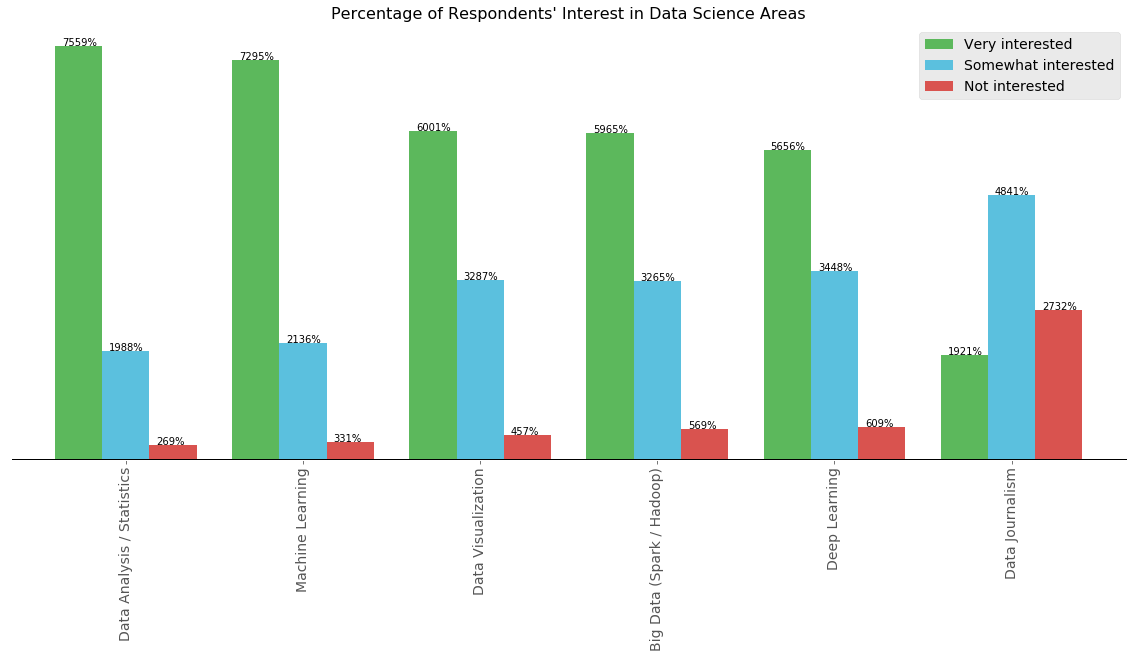

In [58]:
df_can.sort_values(by='Very interested', ascending=False, axis=0, inplace=True)
#df_can_per = (100. * df_can / df_can.sum()).round(2).astype(str) + '%'
df_can_per = (100. * df_can /2233).round(2) #.astype(str) + '%'
#df_can_per
#df_can_per.plot(kind='bar', figsize=(20, 8), width=0.8, color=('#5cb85c', '#5bc0de', '#d9534f'))

#title_fsize=16
#plt.title('Percentage of the Respondents\' Interest in Data Science Areas', size=title_fsize) # add title to the plot

#plt.show()

colors_list = ['#5cb85c','#5bc0de','#d9534f']

# Change this line to plot percentages instead of absolute values
ax = (df_can_per).plot(kind='bar',figsize=(20,8),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=df_can_per.columns,fontsize= 14)
plt.title("Percentage of Respondents' Interest in Data Science Areas",fontsize= 16)

plt.xticks(fontsize=14)
#for spine in plt.gca().spines.values():
    #spine.set_visible(False)
plt.yticks([])
ax.set_facecolor('xkcd:white')
ax.axhline(linewidth=2, color='black')

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (p.get_x()+.15*width, p.get_y() + height + 0.01))


In [147]:
df_sf = pd.read_csv('https://cocl.us/sanfran_crime_dataset', index_col = (0))
# skiprows=range(20),sheet_name='Canada by Citizenship',
print ('Data read into a pandas dataframe!')


Data read into a pandas dataframe!


In [135]:
df_sf.head()

Category                                        Descript  \
IncidntNum                                                                 
120058272    WEAPON LAWS                       POSS OF PROHIBITED WEAPON   
120058272    WEAPON LAWS  FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE   
141059263       WARRANTS                                  WARRANT ARREST   
160013662   NON-CRIMINAL                                   LOST PROPERTY   
160002740   NON-CRIMINAL                                   LOST PROPERTY   

           DayOfWeek                    Date   Time  PdDistrict  \
IncidntNum                                                        
120058272     Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN   
120058272     Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN   
141059263     Monday  04/25/2016 12:00:00 AM  14:59     BAYVIEW   
160013662    Tuesday  01/05/2016 12:00:00 AM  23:50  TENDERLOIN   
160002740     Friday  01/01/2016 12:00:00 AM  00:30     MISSION   

                Resolution                 Address           X          Y  \
IncidntNum                                                                  
120058272   ARREST, BOOKED  800 Block of BRYANT ST -122.403405  37.775421   
120058272   ARREST, BOOKED  800 Block of BRYANT ST -122.403405  37.775421   
141059263   ARREST, BOOKED   KEITH ST / SHAFTER AV -122.388856  37.729981   
160013662             NONE  JONES ST / OFARRELL ST -122.412971  37.785788   
160002740             NONE    16TH ST / MISSION ST -122.419672  37.765050   

                                         Location            PdId  
IncidntNum                                                         
120058272    (37.775420706711, -122.403404791479)  12005827212120  
120058272    (37.775420706711, -122.403404791479)  12005827212168  
141059263   (37.7299809672996, -122.388856204292)  14105926363010  
160013662   (37.7857883766888, -122.412970537591)  16001366271000  
160002740   (37.7650501214668, -122.419671780296)  16000274071000

In [148]:
 df_sf.rename(columns={'PdDistrict':'Neighborhood'},inplace=True)

In [170]:
df_sf1=pd.DataFrame(df_sf.groupby('Neighborhood').size().rename('Count')).reset_index()
#df_sf2 = df_sf1.sort_values(['Count'], ascending=False, axis=0)
df_sf1

Neighborhood  Count
0      BAYVIEW  14303
1      CENTRAL  17666
2    INGLESIDE  11594
3      MISSION  19503
4     NORTHERN  20100
5         PARK   8699
6     RICHMOND   8922
7     SOUTHERN  28445
8      TARAVAL  11325
9   TENDERLOIN   9942

In [139]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-2.3.0               |        py36_1001         533 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         631 KB

The following NEW packages will be INSTALLED:

    altair:  2.3.0-py36_1001 conda-forge
    branca:  0.3.1-py_0      conda-forge
    folium:  0.5.0-py_0      conda-forge
    vincent: 0.4.4-py_1      conda-forge


vincent-0.4.4        | 28 KB     | #######################

In [178]:
# download the geojson file

!wget --quiet https://cocl.us/sanfran_geojson/san-francisco.geojson -O san_fran.geojson

print('GeoJSON file downloaded!')

world_geo = r'san_fran.geojson' # geojson file

# create a plain world map

world_map = folium.Map(location=[39,-120], zoom_start=10, tiles='Mapbox Bright')

# generate choropleth map

world_map.choropleth(

geo_data=world_geo,

data=df_sf1,

columns=['Neighborhood', 'Count'],

key_on='feature.properties.DISTRICT',

fill_color='YlOrRd',

fill_opacity=0.7,

line_opacity=0.2,

legend_name='Crime Rate in San Francisco',

)

# display map

world_map

GeoJSON file downloaded!


In [162]:
!wget --quiet https://cocl.us/sanfran_geojson/san-francisco.geojson -o san-francisco.geo.json
print('GeoJSON file downloaded!')





GeoJSON file downloaded!


In [167]:
world_geo = r'san-francisco.json'
#world_geo = r'https://cocl.us/sanfran_geojson/san-francisco.geo.json'
world_map = folium.Map(location=[38,-122], zoom_start=12, tiles='Mapbox Bright')

In [168]:

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
world_map.choropleth(
    geo_data=world_geo,
    data=df_sf1,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.district',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map